## R-Script Hidden Markov Models

This is run with an R kernel instead of a python kernel. It might take some setting up to figure out...

More reading:

- https://cran.r-project.org/web/packages/moveHMM/vignettes/moveHMM-guide.pdf
- https://stackoverflow.com/questions/57870575/install-and-run-r-kernel-for-jupyter-notebook


In [1]:
library(ggplot2)
library(moveHMM)
library(arrow)

Loading required package: CircStats

Loading required package: MASS

Loading required package: boot


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
gps_data <- read_parquet("./output-data/filtered_gps.parq")

In [4]:
prepped_data <- prepData(gps_data,type="LL",coordNames=c("lon","lat"), LLangle=FALSE)

Warning message in prepData(gps_data, type = "LL", coordNames = c("lon", "lat"), :
“There are 19629 missing covariate values. Each will be replaced by the closest available value.”


In [25]:
head(gps_data_simple)

,ID,step,angle,x,y,raster_value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,399253139925_gap_1,0.15102005,NA,-76.88592,39.22887,0.101
2,399253139925_gap_1,0.25739695,1.0406742,-76.88448,39.22963,0.101
3,399253139925_gap_1,0.13020078,-1.9408695,-76.88437,39.23195,0.061
4,399253139925_gap_1,0.40659312,-1.7267289,-76.88306,39.23137,0.051
5,399253139925_gap_1,0.01970858,2.5202213,-76.88517,39.22810,0.081
6,399253139925_gap_1,0.05653174,-0.8533943,-76.88496,39.22818,0.101


In [5]:
gps_data_simple <- subset(prepped_data, select = c("ID","step","angle","x","y","raster_value"))
names(gps_data_simple) <- c("ID", "step", "angle","x","y", "raster_value")
names(gps_data_simple)
 
gps_data_home <- subset(prepped_data, select = c("ID","x","y","step","return_home_angle", "raster_value", "return_home_distance"))
names(gps_data_home) <- c("ID", "x","y","step", "angle", "raster_value", "return_home_distance") 

[1] "ID"           "step"         "angle"        "x"            "y"           
[6] "raster_value"

In [23]:
# gps_data_simple
gps_data_simple$raster_value <- gps_data_simple$raster_value/10+0.001

In [7]:
# gps_data_simple_prepped <- prepData(gps_data,type="LL",coordNames=c("lon","lat"), LLangle=FALSE)
# gps_data_home_prepped <- prepData(gps_data,type="LL",coordNames=c("lon","lat"), LLangle=FALSE)
# prep_data$step <- prep_data$step_distance
# # prep_data$angle <- prep_data$return_home_angle
# prep_data$angle <- prep_data$turn_angle

In [29]:
gps_data_home

,ID,x,y,step,angle,raster_value,return_home_distance
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,399253139925_gap_1,-76.88592,39.22887,0.151020052,-2.3553476,10,7510.779
2,399253139925_gap_1,-76.88448,39.22963,0.257396947,-2.3553476,10,7621.636
3,399253139925_gap_1,-76.88437,39.23195,0.130200782,2.8952697,6,7874.458
4,399253139925_gap_1,-76.88306,39.23137,0.406593122,-1.4668454,5,7838.397
5,399253139925_gap_1,-76.88517,39.22810,0.019708578,0.2745792,8,7441.591
6,399253139925_gap_1,-76.88496,39.22818,0.056531742,-2.2481450,10,7454.380
7,399253139925_gap_1,-76.88442,39.22790,0.111188773,-1.4036239,10,7435.119
8,399253139925_gap_1,-76.88321,39.22754,0.023024589,-1.6123341,5,7422.681
9,399253139925_gap_1,-76.88345,39.22764,0.027370657,1.6428526,5,7428.110


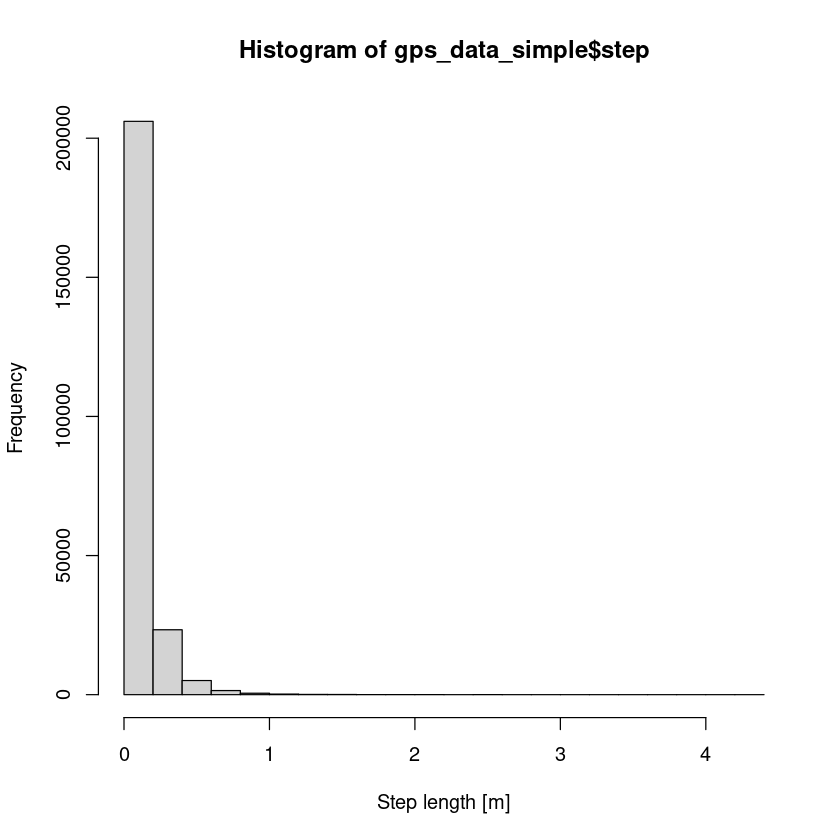

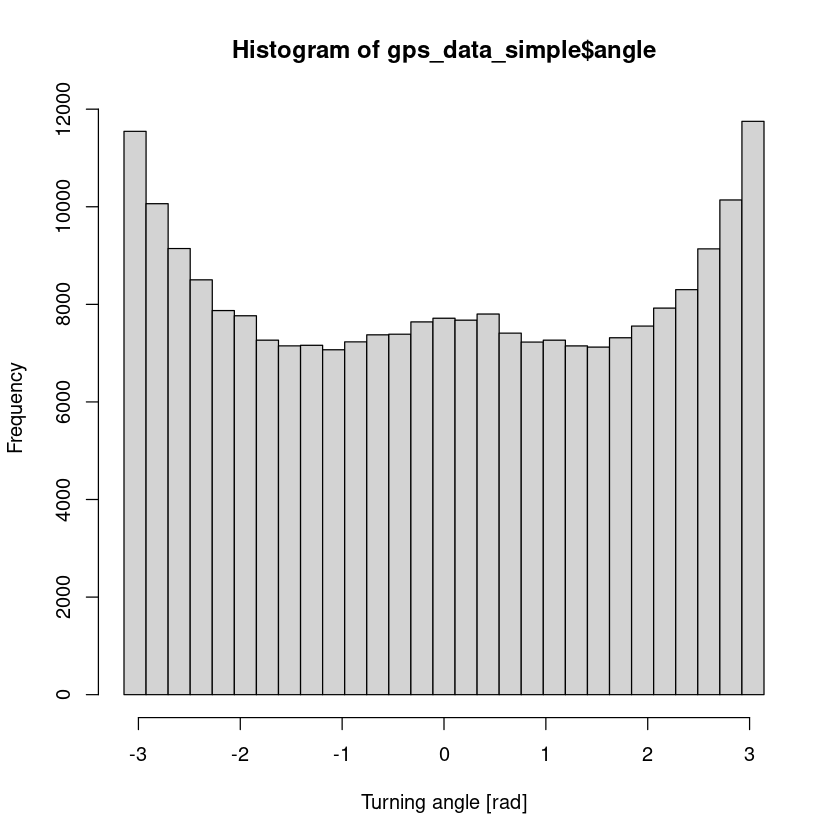

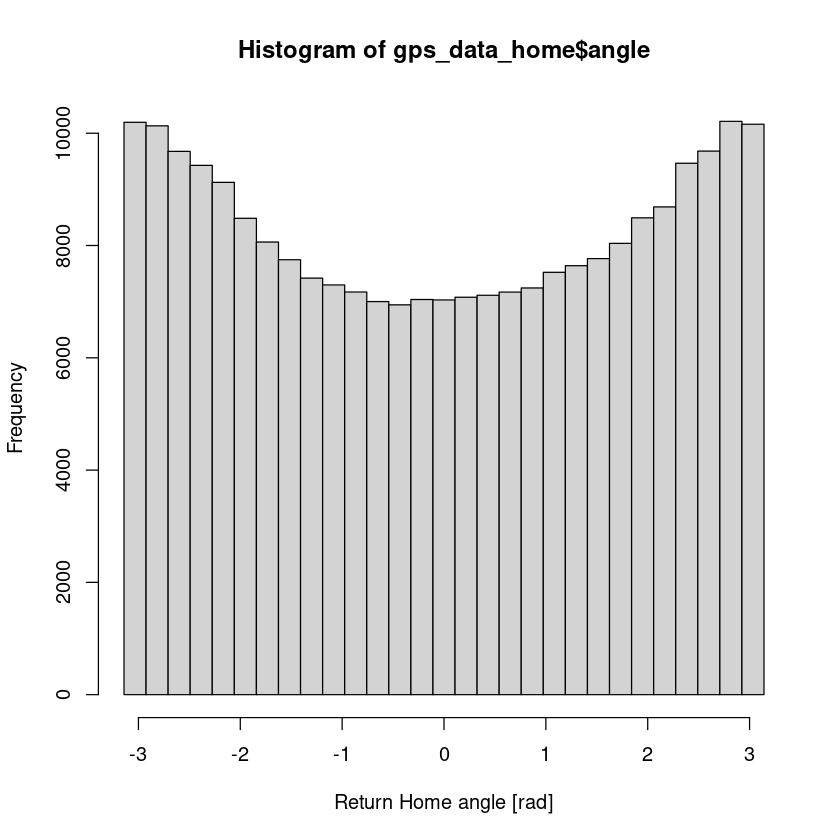

In [8]:
hist(gps_data_simple$step, xlab = "Step length [m]")
hist(gps_data_simple$angle, breaks = seq(-pi, pi, length = 30), xlab = "Turning angle [rad]")
hist(gps_data_home$angle, breaks = seq(-pi, pi, length = 30), xlab = "Return Home angle [rad]") 

## 3 Different HMM Models:

 - Mod_Simple: Create a HMM that is very similar to the example: turns and steps are modelled on Cauchy and Weibull dists without any regard to the centroid
 - Mod_Turn: Use the return to centroid angle as the turn angle parameter. Steps stay the same
 - Mod_ThreeState: Use 3 states instead of 2, but otherwise the same as teh simple model.


### Return Home Model

In [9]:
#     c == rho
#     loc == mu
# [[Variables]]
#     B1_mu:     0.14626947 +/- 0.01824886 (12.48%) (init = 0.01)
#     B1_rho:    0.24394455 +/- 0.01116023 (4.57%) (init = 0.3)
#     B1_scale:  2.32557673 +/- 0.18282389 (7.86%) (init = 2)
#     B2_mu:    -2.99977139 +/- 0.01898019 (0.63%) (init = -3.1)
#     B2_rho:    0.24008248 +/- 0.01152450 (4.80%) (init = 0.3)
#     B2_scale:  2.33783690 +/- 0.18531391 (7.93%) (init = 4)

In [26]:
# Weibull Params 
shape <- c(1.4, 1.0)
scale <- c(0.030, 0.200)

#Cauchy params  FOR RETURN HOME ANGLE
mean <- c(0.1415, -3.0)
concentration <- c(0.24, 0.24)

zero_mass0 <- c(0.2, 0.2)
#if we have duplicates (step-length zero) the first zero_mass should not be zero
stepPar1 <- c(shape,scale,zero_mass0)
anglePar1<- c(mean,concentration)

In [30]:
mod_turn <- fitHMM(data = gps_data_home, 
               nbStates = 2, 
               stepDist = 'weibull',
               angleDist = 'wrpcauchy', 
               stepPar0 = stepPar1, 
               anglePar0 = anglePar1,
               formula=~return_home_distance
                  )

mod_turn

Timing stopped at: 63.18 0.381 63.6



Decoding states sequence... DONE


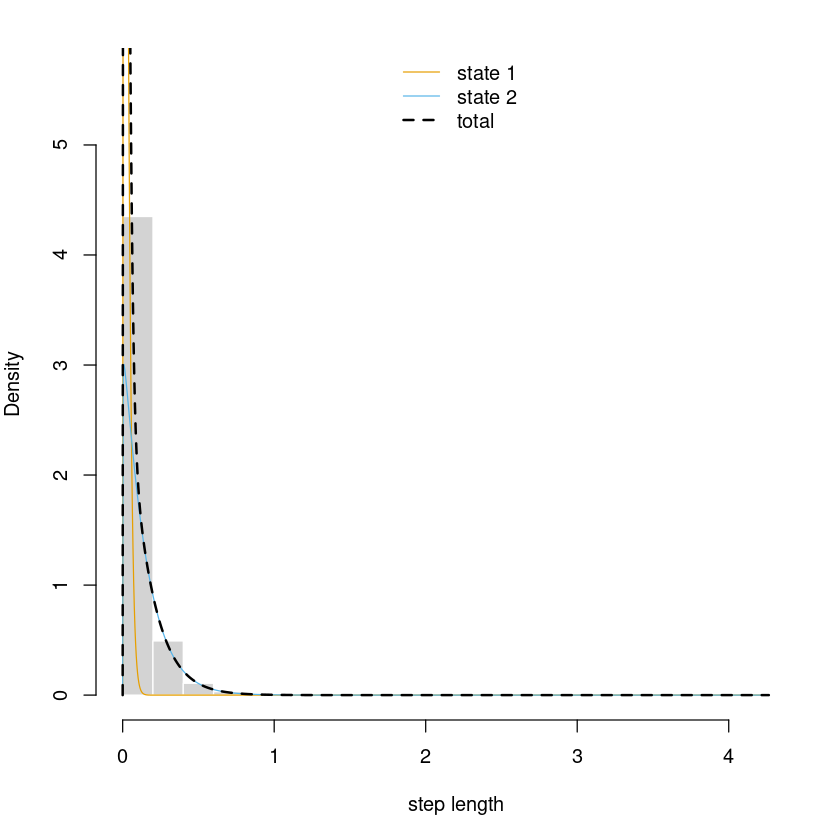

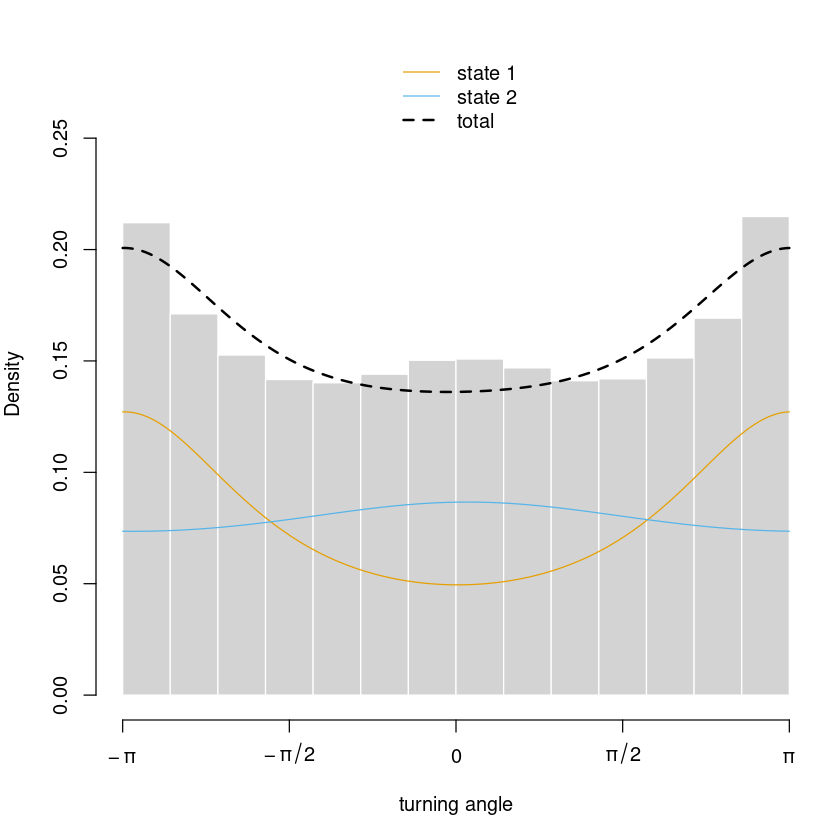

In [22]:
plot(mod_turn, ask = FALSE, plotTracks = FALSE, plotCI = TRUE)

### Simple Model

In [ ]:
# Weibull Params
shape <- c(1.2, 1.1)
scale <- c(0.047, 0.205)

#Cauchy params  FOR RETURN HOME ANGLE
mean <- c(0.1415, -3.0)
concentration <- c(0.24, 0.24)

zero_mass0 <- c(0.01, 0.01)
#if we have duplicates (step-length zero) the first zero_mass should not be zero
stepPar1 <- c(shape,scale,zero_mass0)
anglePar1<- c(mean,concentration)

In [ ]:
mod_simple <- fitHMM(data = gps_data_simple, 
               nbStates = 2, 
               stepDist = 'weibull',
               angleDist = 'wrpcauchy', 
               stepPar0 = stepPar1, 
               anglePar0 = anglePar1,
               formula=~raster_value)

mod_simple

In [ ]:
plot(mod_simple, ask = FALSE, plotTracks = FALSE, plotCI = TRUE)

In [ ]:
plotStationary(mod_simple, plotCI=TRUE)

In [ ]:
mod_simple$mle$beta

### 3 States

In [13]:
# Weibull Params
shape <- c(1.2, 1.1, 1.0)
scale <- c(0.05, 0.1, 0.300)

#Cauchy params
mean <- c(-3.1415, 0.11, 0)
concentration <- c(0.23, 0.04, 0.01)

zero_mass0 <- c(0.1,0.1,0.1)
#if we have duplicates (step-length zero) the first zero_mass should not be zero
stepPar2 <- c(shape,scale,zero_mass0)
anglePar2<- c(mean,concentration)

In [28]:
mod_3states <- fitHMM(data = gps_data_simple, 
               nbStates = 3, 
               stepDist = 'weibull',
               angleDist = 'wrpcauchy',
               stepPar0 = stepPar2, 
               anglePar0 = anglePar2,
               # formula=~raster_value
                     )

mod_3states

Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”
Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”
Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


Value of the maximum log-likelihood: -73455.81 

Step length parameters:
----------------------
               state 1      state 2      state 3
shape     1.466512e+00 1.223807e+00 1.339747e+00
scale     2.425404e-02 1.156054e-01 3.582985e-01
zero-mass 7.405889e-05 1.201009e-09 3.439723e-08

Turning angle parameters:
------------------------
                state 1    state 2    state 3
mean          -3.121788 3.08408798 0.06071726
concentration  0.206956 0.03454019 0.22903783

Regression coeffs for the transition probabilities:
--------------------------------------------------
              1 -> 2    1 -> 3    2 -> 1    2 -> 3    3 -> 1     3 -> 2
intercept -0.6116484 -3.245658 -1.013979 -2.568129 -1.044115 -0.7944741

Transition probability matrix:
-----------------------------
          [,1]      [,2]       [,3]
[1,] 0.6323515 0.3430229 0.02462563
[2,] 0.2520213 0.6947092 0.05326950
[3,] 0.1951430 0.2504786 0.55437841

Initial distribution:
--------------------
[1] 0.3854263 0.4741

In [ ]:
# mod_3statesB <- fitHMM(data = gps_data_simple, 
#                nbStates = 3, 
#                # stepDist = 'weibull',
#                # angleDist = 'wrpcauchy',
#                stepPar0 = stepPar2, 
#                anglePar0 = anglePar2,
#                formula=~raster_value)

# mod_3statesB

# This doesn't converge.

In [ ]:
plot(mod_3states, ask = FALSE, plotTracks = FALSE, plotCI = TRUE)

In [ ]:
plotStationary(mod_3states, plotCI=TRUE)

In [ ]:
mod_3states$mle$beta

## 3-States Return Home Model

In [15]:
# Weibull Params
shape <- c(1.2, 1.1, 1.0)
scale <- c(0.05, 0.1, 0.300)

#Cauchy params
mean <- c(-3.1415, 0.11, 0)
concentration <- c(0.23, 0.04, 0.01)

zero_mass0 <- c(0.1,0.1,0.1)
#if we have duplicates (step-length zero) the first zero_mass should not be zero
stepPar2 <- c(shape,scale,zero_mass0)
anglePar2<- c(mean,concentration)

In [16]:
mod_3states_rh <- fitHMM(data = gps_data_home, 
               nbStates = 3, 
               stepDist = 'weibull',
               angleDist = 'wrpcauchy',
               stepPar0 = stepPar2, 
               anglePar0 = anglePar2,
               formula=~raster_value)

mod_3states_rh

ERROR: Error in nlm(nLogLike, wpar, nbStates, bounds, parSize, data, stepDist, : non-finite value supplied by 'nlm'


Timing stopped at: 10.54 0.005 10.56



In [ ]:
plot(mod_3states_rh, ask = FALSE, plotTracks = FALSE, plotCI = TRUE)

## But which is best?

Use the AIC and BIC curves to decide which model is best. 

In [ ]:
AIC(mod_turn, mod_simple, mod_3states, mod_3states_rh)

This is a little worrying... It looks like the best representation of the GPS data is a 3 state model that doesn't care about centroids... This would mean that the best way model might be some kind of three state model that includes the home range, somehow, and would therefore have a more complex covariate model. Maybe something of the form:

formula =~ raster_value + Distance to Centroid + Angle to centroid? 

But actually it might have something to do with different emissions per state? 

## MultiCovariate models

    
    Step length parameters:
    ----------------------
                   state 1      state 2      state 3
    shape     1.473867e+00 1.194904e+00 1.4011365034
    scale     2.439984e-02 1.177599e-01 0.3978736432
    zero-mass 7.752780e-08 4.222359e-08 0.0004580461
    
    Turning angle parameters:
    ------------------------
                     state 1    state 2    state 3
    mean          -3.1171162 3.03462281 0.04697571
    concentration  0.2112107 0.02633846 0.25087468

In [ ]:
# gps_data_covariates <- subset(prepped_data, select = c("ID","step","angle","x","y","raster_value","return_home_distance","return_home_angle"))


# # Weibull Params
# shape <- c(1.5, 1.2, 1.3)
# scale <- c(0.025, 0.11, 0.400)

# #Cauchy params
# mean <- c(-3.1415, 3, 0.05)
# concentration <- c(0.21, 0.02, 0.025)

# zero_mass0 <- c(0.001,0.001,0.001)
# #if we have duplicates (step-length zero) the first zero_mass should not be zero
# stepPar2 <- c(shape,scale,zero_mass0)
# anglePar2<- c(mean,concentration)

# mod_3_covars <- fitHMM(data = gps_data_covariates, 
#                nbStates = 3, 
#                stepDist = 'weibull',
#                angleDist = 'wrpcauchy',
#                stepPar0 = stepPar2, 
#                anglePar0 = anglePar2,
#                formula=~raster_value+return_home_distance)

# mod_3_covars

In [ ]:
mod_3_covars

In [ ]:
plot(mod_3_covars, ask = FALSE, plotTracks = FALSE, plotCI = TRUE)